<img src="img/logos_combined.png" alt="EarthServer-logo" align="right" width="40%"  border="4">
<br><br><br><br>



# WCS for Climate Sciences
## Creating a Climate Graph for Vienna


### Julia Wagemann

A climate graph is commonly used to describe the average weather of one specific location. It contains:
* the <b>long-term average, minimum and maximum air temperature</b> for each month
* the <b>long-term average precipitation</b> for each month
<br>
<br>
<img src="img/climate_graph_vienna.png" alt="Climate_graph_Vienna" align="center" width="80%"  border="4">


## Data required 
<br>
<b> ERA-Interim reanalysis - 2m air temperature and total precipitation from 1 January 1979 to 31 December 2014</b>
* <b>Format: <a font-color="blue">GRIB</a></b>
* <b>Spatial resolution: <a font-color="blue">Lat/Lon grid, 0.5 x 0.5 degrees, 720 x 361 gridpoints</a></b>
* <b>Temporal resolution: <a font-color="blue">6-hourly</a></b>
* <b>Data volume: <a font-color="blue">27 GB per parameter</a></b>


## Workflow
<br>

<b>(1) Retrieve monthly mean, min and max 2m air temperature from Jan 1979 to Dec 2014</b> 
<br>

<b>(2) Retrieve monthly sums of total precipitation from Jan 1979 to Dec 2014</b>
<br>

<b>(3) Calculate averages for every month for every parameter</b>
<br>

<b>(4) Plot the climate graph</b>


## Preparations

### Load required libraries

In [3]:
%matplotlib inline
import requests
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas

### Helper functions

In [4]:
# A list for every first day in the month from Jan 1979 to Dec 2014
startDateList = (range(432))
x =datetime(1979,1,1,0)
for i in range(0,len(startDateList)):
    startDateList[i]=x
    x=(x.replace(day=1)+timedelta(days=31)).replace(day=1)

# A list with every last day of the month from Jan 1979 to Dec 2014
endDateList = (range(432))
for i in range(0, len(endDateList)):
    y = startDateList[i].replace(hour=18) + relativedelta(day=31)
    endDateList[i]=y

startDateListISO=(range(432))
for i in range(0,len(startDateListISO)):
    startDateListISO[i]=startDateList[i].date().isoformat()

## Define the WCPS query

With one WCPS request,
* the <b>data can be converted into a different unit</b>, e.g. from Kelvin to degree Celsius, and
* a <b>mathematical condenser</b>, e.g. average, minimum or maximum, can be applied to the data values retrieved

In [5]:
# WCPS query format for 2m air temperature (conversion of Kelvin to degree Celsius)
url_fmt_temp = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (%s) return encode(%s(c[Lat(%f:%f), Long(%f:%f),ansi("%s":"%s")] - 273.15), "csv")'

# WCPS query format for total precipitation (conversion from m of water to mm of water)
url_fmt_precip = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (%s) return encode(%s(c[Lat(%f:%f), Long(%f:%f),ansi("%s":"%s")] * 1000), "csv")'

## Function to retrieve data from the Web Coverage Service


In [6]:
# Function that retrieves for every month all data values from the WCS server and appends the outputs to a python list
def retrieveFromWCS(param, operation, latMin, latMax, lonMin, lonMax):
    if param=="precipitation":
        startDateList[0]=startDateList[0] + timedelta(days=1)
        query = url_fmt_precip
    else:
        query = url_fmt_temp
    
    monthlyTS = []
    for i,j in zip(startDateList,endDateList):
        url = query % (param, operation, latMin,latMax,lonMin,lonMax,
                       i.isoformat(),j.isoformat())
        print url
        r= requests.get(url,
                proxies={'http':None}
                )

        r.raise_for_status()
        y= [float(a) for a in r.text[0:-1].split(",")]
        monthlyTS.append(y[0])
    
    return monthlyTS

### Workflow step (1): <br>

## <a font-color="blue">Retrieve average, minimum and maximum surface temperature for Vienna for every month</a>

In [7]:
latMin = 48.2
latMax = 48.2
lonMin = 16.2
lonMax = 16.2
monthlyTS_avg = retrieveFromWCS("temp2m", "avg", latMin, latMax, lonMin, lonMax)
monthlyTS_max = retrieveFromWCS("temp2m", "max", latMin, latMax, lonMin, lonMax)
monthlyTS_min = retrieveFromWCS("temp2m", "min", latMin, latMax, lonMin, lonMax)

http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(avg(c[Lat(48.200000:48.200000), Long(16.200000:16.200000),ansi("1979-01-01T00:00:00":"1979-01-31T18:00:00")] - 273.15), "csv")
http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(avg(c[Lat(48.200000:48.200000), Long(16.200000:16.200000),ansi("1979-02-01T00:00:00":"1979-02-28T18:00:00")] - 273.15), "csv")
http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(avg(c[Lat(48.200000:48.200000), Long(16.200000:16.200000),ansi("1979-03-01T00:00:00":"1979-03-31T18:00:00")] - 273.15), "csv")
http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(avg(c[Lat(48.200000:48.200000), Long(16.200000:16.200000),ansi("1979-04-01T00:00:00":"1979-04-3

KeyboardInterrupt: 

### Workflow step (2): <br> 
## <a font-color="blue">Retrieve monthly sums of total precipitation for Vienna for every month</a>

In [57]:
latMin = 48.1
latMax = 48.1
lonMin = 16.2
lonMax = 16.2
monthlyTS_sum = retrieveFromWCS("precipitation", "add", latMin, latMax, lonMin, lonMax)

http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (precipitation) return encode(add(c[Lat(48.100000:48.100000), Long(16.200000:16.200000),ansi("1979-01-02T00:00:00":"1979-01-31T18:00:00")] * 1000), "csv")
http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (precipitation) return encode(add(c[Lat(48.100000:48.100000), Long(16.200000:16.200000),ansi("1979-02-01T00:00:00":"1979-02-28T18:00:00")] * 1000), "csv")
http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (precipitation) return encode(add(c[Lat(48.100000:48.100000), Long(16.200000:16.200000),ansi("1979-03-01T00:00:00":"1979-03-31T18:00:00")] * 1000), "csv")
http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (precipitation) return encode(add(c[Lat(48.100000:48.100000), Long(16.200000:16.200000),ansi("1979-04-0

### Workflow step (3): <br> 
## <a font-color="blue">Calculate averages for every month for every parameter</a>

In [62]:
def calculateMonthlyAvgTS (inputArray):
    tmp = np.empty((12))
    for i in range(0,12):
        month = inputArray[i::12]
        tmp[i] = np.mean(month, axis=0)
    return tmp

monthsAvg = calculateMonthlyAvgTS(monthlyTS_avg)
monthsMax = calculateMonthlyAvgTS(monthlyTS_max)
monthsMin = calculateMonthlyAvgTS(monthlyTS_min)
monthsAvg_precip = calculateMonthlyAvgTS(monthlyTS_sum)

### Workflow step (4): <br>
## <a font-color="blue">Plot the climate graph for Vienna I</a>

In [78]:
# Prepare pandas data frame for plotting
df = pandas.DataFrame(months, columns=['Month'])
df['temp_avg'] = pandas.Series(monthsAvg, index=df.index)
df['temp_max'] = pandas.Series(monthsMax, index=df.index)
df['temp_min'] = pandas.Series(monthsMin, index=df.index)
df['precip_avg'] =pandas.Series(monthsAvg_precip, index=df.index)

### Workflow step (4): <br>
## <a font-color="blue">Plot the climate graph for Vienna II</a>

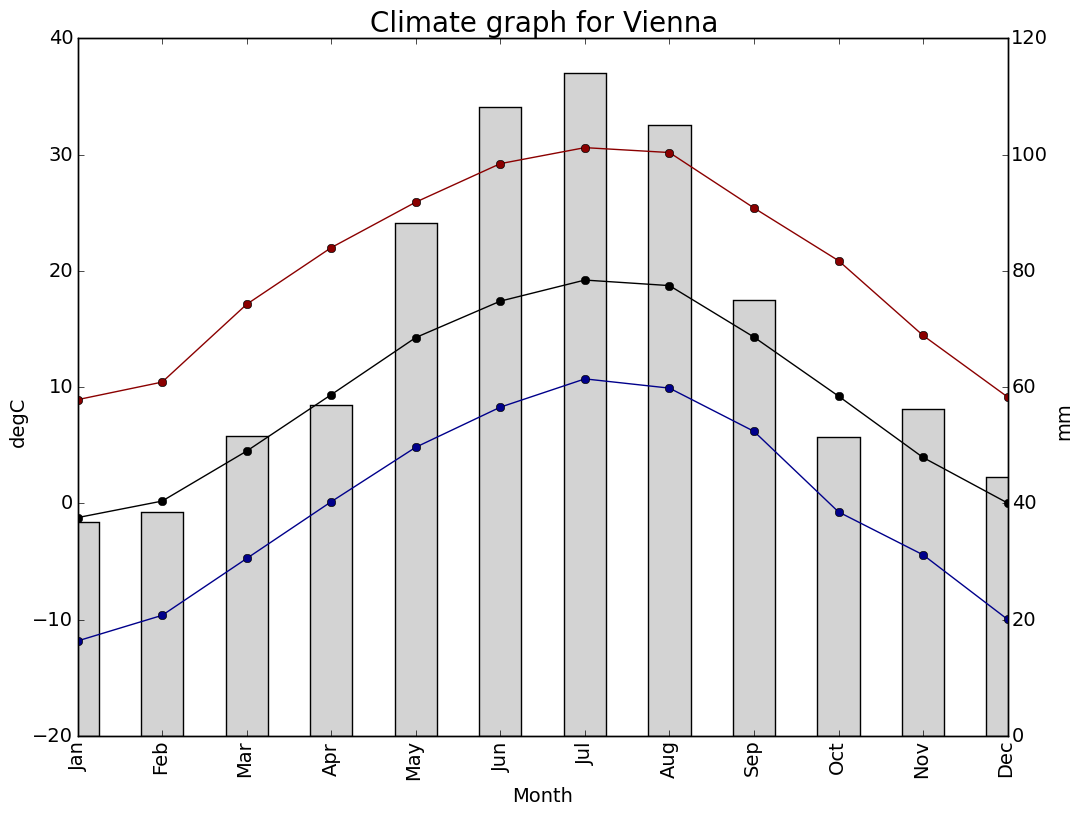

In [79]:
ax1 = df[['Month','precip_avg']].plot(x='Month',kind='bar',color='#D3D3D3', 
                                      legend=False, figsize=(12,9), fontsize=12)
ax2 = ax1.twinx()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
columns = ["temp_avg", "temp_max", "temp_min"]

ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.set_title("Climate graph for Vienna", fontsize=20)
ax1.set_xlabel("Month", fontsize=14)
ax2.set_ylabel("mm", labelpad=35, y=0.45, fontsize=14)
ax1.set_ylabel("degC", labelpad=35, y=0.45,fontsize=14)

df[['Month', 'temp_avg']].plot(x='Month',linestyle='-',marker='o', ax=ax2,color='black', legend=False)
df[['Month', 'temp_max']].plot(x='Month', linestyle='-',marker='o',ax=ax2,color='darkred',legend=False)
df[['Month', 'temp_min']].plot(x='Month', linestyle='-',marker='o',ax=ax2,color='darkblue', legend=False)

plt.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

plt.show()

<img src="img/logos_combined.png" alt="EarthServer-logo" align="right" width="40%"  border="4">
<br><br><br><br>

# Conclusion

* more than 50 GB of data were accessed and processed on demand
<br>

* time-series information were extracted from a multi-dimensional data set
<br>

* no data was downloaded
